Data preparation

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Paths ---
data_dir = "C:/Users/ANISH/Desktop/project 3/yawdd/yawn"  # 📂 Contains 'closed' and 'open' subfolders

# --- Image Data Generator ---
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1159 images belonging to 2 classes.
Found 289 images belonging to 2 classes.


CNN model architecture

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

Compile the model

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,778 (2.61 MB)

 Trainable params: 683,330 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

Train the model

In [17]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen
)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.5506 - loss: 1.4892 - val_accuracy: 0.5017 - val_loss: 0.8028
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step - accuracy: 0.5682 - loss: 1.0193 - val_accuracy: 0.5017 - val_loss: 0.9455
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.5988 - loss: 0.7684 - val_accuracy: 0.5017 - val_loss: 1.2922
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 325ms/step - accuracy: 0.6285 - loss: 0.6882 - val_accuracy: 0.5017 - val_loss: 1.4577
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 342ms/step - accuracy: 0.6679 - loss: 0.5965 - val_accuracy: 0.5017 - val_loss: 1.5206
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.6281 - loss: 0.6375 - val_accuracy: 0.5017 - val_loss: 1.8162
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 551ms/step - accuracy: 0.6295 - loss: 0.6473 - val_accuracy: 0.5017 - val_loss: 1.9213
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 504ms/step - accuracy: 0.6545 - loss: 0.6137 - val_accu

Save model

In [18]:
model.save('yawn_cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


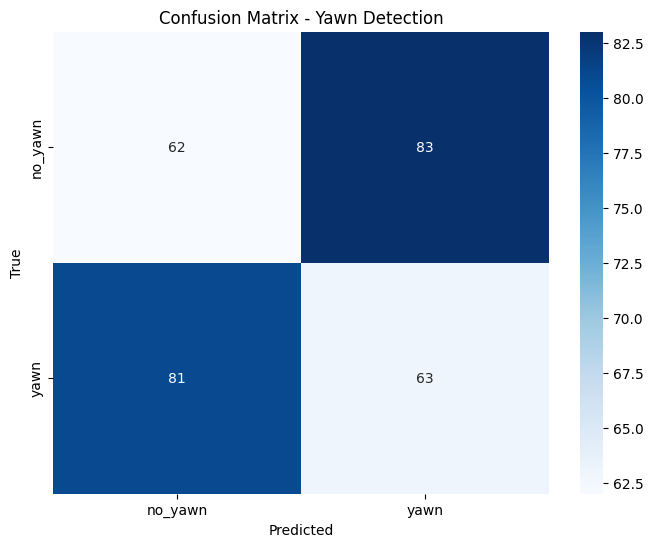

Classification Report:
              precision    recall  f1-score   support

     no_yawn       0.43      0.43      0.43       145
        yawn       0.43      0.44      0.43       144

    accuracy                           0.43       289
   macro avg       0.43      0.43      0.43       289
weighted avg       0.43      0.43      0.43       289



In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

# You can loop through the validation generator and predict
for images, labels in val_gen:
    preds = model.predict(images)
    
    # Convert one-hot labels and predictions to class indices
    y_true.extend(np.argmax(labels, axis=1))      # no .numpy() needed
    y_pred.extend(np.argmax(preds, axis=1))
    
    # Break after one complete pass (because generators are infinite if steps_per_epoch not given)
    if len(y_true) >= val_gen.samples:
        break

# Get class names from generator
class_names = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Yawn Detection')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))